In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('Airbnb-Milan.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322 entries, 0 to 9321
Data columns (total 61 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        9322 non-null   int64  
 1   id                                9322 non-null   int64  
 2   host_id                           9322 non-null   int64  
 3   host_location                     9322 non-null   int64  
 4   host_response_time                9322 non-null   int64  
 5   host_response_rate                9322 non-null   int64  
 6   host_is_superhost                 9322 non-null   int64  
 7   host_total_listings_count         9322 non-null   int64  
 8   host_has_profile_pic              9322 non-null   int64  
 9   host_identity_verified            9322 non-null   int64  
 10  neighbourhood_cleansed            9322 non-null   int64  
 11  zipcode                           9322 non-null   int64  
 12  latitu

,Unnamed: 0,id,host_id,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,Iron,Host_greets_you,Paid_parking_on_premises,Luggage_dropoff_allowed,Long_term_stays_allowed,Doorman,Pets_allowed,Smoking_allowed,Suitable_for_events,24_hour_check_in
0,1,73892,387110,1,1,57,0,3,1,1,...,1,0,0,0,0,0,0,0,1,0
1,2,74169,268127,1,1,57,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,3,77958,387110,1,1,57,0,3,1,1,...,1,0,0,0,0,0,0,0,1,0
3,4,93025,499743,1,1,57,0,1,1,0,...,1,0,1,1,0,0,1,0,0,0
4,5,132705,391011,1,1,57,1,2,1,0,...,1,1,0,0,0,0,0,0,0,0


In [4]:
data = df[["host_is_superhost","host_identity_verified","bathrooms", "bedrooms", "daily_price", "security_deposit", "minimum_nights","number_of_reviews", "review_scores_rating" ]]

print(len(data))
data.head(10)

9322


,host_is_superhost,host_identity_verified,bathrooms,bedrooms,daily_price,security_deposit,minimum_nights,number_of_reviews,review_scores_rating
0,0,1,3,1,94,1,2,84,94
1,0,0,3,1,125,31,2,3,100
2,0,1,3,1,100,1,2,70,97
3,0,0,3,1,120,48,2,57,97
4,1,0,3,0,70,13,30,44,90
5,0,1,3,1,200,48,15,79,98
6,1,0,5,1,700,1,1,72,96
7,0,0,3,1,250,73,1,126,98
8,0,1,3,1,100,13,1,377,94
9,0,0,3,1,280,1,1,22,95


In [5]:
df['host_is_superhost'].replace({0: 'NO', 1: 'SI'}, inplace=True)
print(df)

      Unnamed: 0        id    host_id  host_location  host_response_time  \
0              1     73892     387110              1                   1   
1              2     74169     268127              1                   1   
2              3     77958     387110              1                   1   
3              4     93025     499743              1                   1   
4              5    132705     391011              1                   1   
...          ...       ...        ...            ...                 ...   
9317        9318  35954783   56584596              1                   1   
9318        9319  36023503  271013325              1                   1   
9319        9320  36071908  271354203              1                   0   
9320        9321  36305676  171239896              1                   1   
9321        9322  36463651  174590119              1                   1   

      host_response_rate host_is_superhost  host_total_listings_count  \
0             

In [6]:
df['host_identity_verified'].replace({0: 'NO VERFICA', 1: 'VERIFICA'}, inplace=True)
print(df)

      Unnamed: 0        id    host_id  host_location  host_response_time  \
0              1     73892     387110              1                   1   
1              2     74169     268127              1                   1   
2              3     77958     387110              1                   1   
3              4     93025     499743              1                   1   
4              5    132705     391011              1                   1   
...          ...       ...        ...            ...                 ...   
9317        9318  35954783   56584596              1                   1   
9318        9319  36023503  271013325              1                   1   
9319        9320  36071908  271354203              1                   0   
9320        9321  36305676  171239896              1                   1   
9321        9322  36463651  174590119              1                   1   

      host_response_rate host_is_superhost  host_total_listings_count  \
0             

In [7]:
summary_stats = df.describe()
print(summary_stats)

        Unnamed: 0            id       host_id  host_location  \
count  9322.000000  9.322000e+03  9.322000e+03    9322.000000   
mean   4661.500000  1.908042e+07  6.623391e+07       0.959558   
std    2691.173938  1.080544e+07  7.686396e+07       0.197004   
min       1.000000  2.398600e+04  2.405400e+04       0.000000   
25%    2331.250000  8.225660e+06  9.780440e+06       1.000000   
50%    4661.500000  2.079747e+07  2.789633e+07       1.000000   
75%    6991.750000  2.888363e+07  1.108520e+08       1.000000   
max    9322.000000  3.646365e+07  2.726798e+08       1.000000   

       host_response_time  host_response_rate  host_total_listings_count  \
count         9322.000000         9322.000000                9322.000000   
mean             0.869234           53.256919                  23.186977   
std              0.337162           10.365986                  96.380476   
min              0.000000            1.000000                   0.000000   
25%              1.000000         

In [8]:
filtered_df = df[df['minimum_nights'] <= 7]
print(filtered_df)

      Unnamed: 0        id    host_id  host_location  host_response_time  \
0              1     73892     387110              1                   1   
1              2     74169     268127              1                   1   
2              3     77958     387110              1                   1   
3              4     93025     499743              1                   1   
6              7    233795    1224206              1                   1   
...          ...       ...        ...            ...                 ...   
9317        9318  35954783   56584596              1                   1   
9318        9319  36023503  271013325              1                   1   
9319        9320  36071908  271354203              1                   0   
9320        9321  36305676  171239896              1                   1   
9321        9322  36463651  174590119              1                   1   

      host_response_rate host_is_superhost  host_total_listings_count  \
0             

In [9]:
average_price_by_host_verification = df.groupby('host_identity_verified')['daily_price'].mean()
print(average_price_by_host_verification)

host_identity_verified
NO VERFICA    103.712750
VERIFICA      103.764677
Name: daily_price, dtype: float64


In [10]:
superhosts = data[data["host_is_superhost"] == 1]

non_superhosts = data[data["host_is_superhost"] == 0]

total_resenas_superhosts = superhosts["number_of_reviews"].sum()
total_resenas_non_superhosts = non_superhosts["number_of_reviews"].sum()

if total_resenas_superhosts > total_resenas_non_superhosts:
    print("Los superanfitriones tienen un mayor número de reseñas.")
elif total_resenas_superhosts < total_resenas_non_superhosts:
    print("Los no superanfitriones tienen un mayor número de reseñas.")
else:
    print("Los superanfitriones y los no superanfitriones tienen el mismo número de reseñas.")

Los no superanfitriones tienen un mayor número de reseñas.


In [11]:
superhosts = data[data["host_is_superhost"] == 1]
puntuacion_media_superhosts = superhosts["host_is_superhost"].mean()

non_superhosts = data[data["host_is_superhost"] == 0]
puntuacion_media_non_superhosts = non_superhosts["host_is_superhost"].mean()

if puntuacion_media_superhosts > puntuacion_media_non_superhosts:
    print("Los superanfitriones tienen una puntuación media más alta.")
elif puntuacion_media_superhosts < puntuacion_media_non_superhosts:
    print("Los no superanfitriones tienen una puntuación media más alta.")
else:
    print("Los superanfitriones y los no superanfitriones tienen la misma puntuación media.")

Los superanfitriones tienen una puntuación media más alta.


In [12]:
import pandas as pd

# Definir los límites y etiquetas para los rangos
bin_labels = ["NO ACONSEJABLE", "ESTÁNDAR", "TOP"]
bin_edges = [0, 49, 75, 100]

# Utilizar pd.cut para crear la columna "CATEGORÍA" en función de la puntuación
df["CATEGORÍA"] = pd.cut(df["review_scores_rating"], bins=bin_edges, labels=bin_labels,right=False)
print(df)

      Unnamed: 0        id    host_id  host_location  host_response_time  \
0              1     73892     387110              1                   1   
1              2     74169     268127              1                   1   
2              3     77958     387110              1                   1   
3              4     93025     499743              1                   1   
4              5    132705     391011              1                   1   
...          ...       ...        ...            ...                 ...   
9317        9318  35954783   56584596              1                   1   
9318        9319  36023503  271013325              1                   1   
9319        9320  36071908  271354203              1                   0   
9320        9321  36305676  171239896              1                   1   
9321        9322  36463651  174590119              1                   1   

      host_response_rate host_is_superhost  host_total_listings_count  \
0             

In [13]:
frecuencias = df["CATEGORÍA"].value_counts()

print(frecuencias)

CATEGORÍA
TOP               6929
ESTÁNDAR           236
NO ACONSEJABLE      42
Name: count, dtype: int64


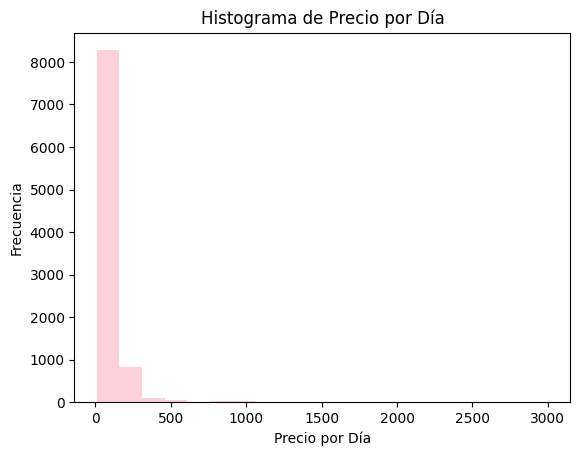

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
# Selecciona la columna "precio" del DataFrame
precio_por_dia = df['daily_price']

# Crea el histograma
plt.hist(precio_por_dia, bins=20, color='pink', alpha=0.7)
# Agrega etiquetas al gráfico
plt.title('Histograma de Precio por Día')
plt.xlabel('Precio por Día')
plt.ylabel('Frecuencia')

# Muestra el histograma
plt.show()

/tmp/ipykernel_30518/303718322.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered["daily_price"], bins=20, color="orange")


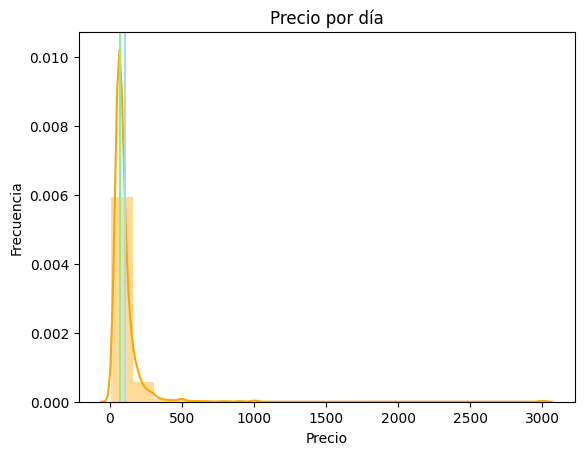

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define df_filtered in a previous cell
df_filtered = df[df['minimum_nights'] <= 7]

sns.distplot(df_filtered["daily_price"], bins=20, color="orange")
plt.title("Precio por día")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.axvline(df_filtered["daily_price"].mean(), color="lightblue")
plt.axvline(df_filtered["daily_price"].median(), color="lightgreen")
plt.show()